In [1]:
import scipy.io.wavfile, scipy.signal, sounddevice
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from matplotlib import cm
from matplotlib.ticker import ScalarFormatter
from timeit import default_timer as timer

plt.rcParams["figure.dpi"] = 120

In [2]:
# 1
N = [128, 256, 512, 1024, 2048, 4096, 8192]
times_my_implementation = []
times_numpy = []

t = np.linspace(0, 1, 10000)
semnal_compus = np.sin(2 * np.pi * 220 * t)
for dft_points in N:
    start = timer()
    X = np.zeros(dft_points, dtype=np.complex_)
    for omega in range(dft_points):
        for n in range(dft_points):
            X[omega] += semnal_compus[n] * np.exp(
                -2 * np.pi * 1j * omega * n / dft_points
            )
    end = timer()
    times_my_implementation.append(end - start)

    start = timer()
    X = np.fft.fft(semnal_compus, dft_points)
    end = timer()
    times_numpy.append(end - start)

[]

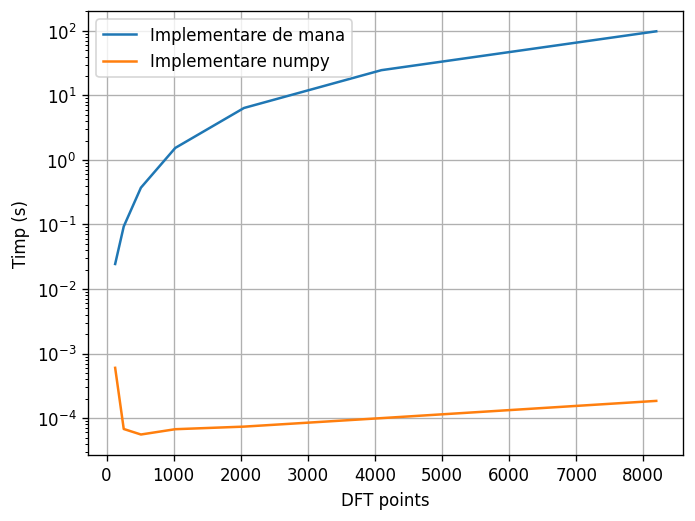

In [3]:
fig, ax = plt.subplots()
ax.plot(N, times_my_implementation, label="Implementare de mana")
ax.plot(N, times_numpy, label="Implementare numpy")
ax.set_xlabel("DFT points")
ax.set_ylabel("Timp (s)")
ax.legend()
ax.grid()
ax.set_yscale("log")

plt.plot()

[27, 77, 127]


[]

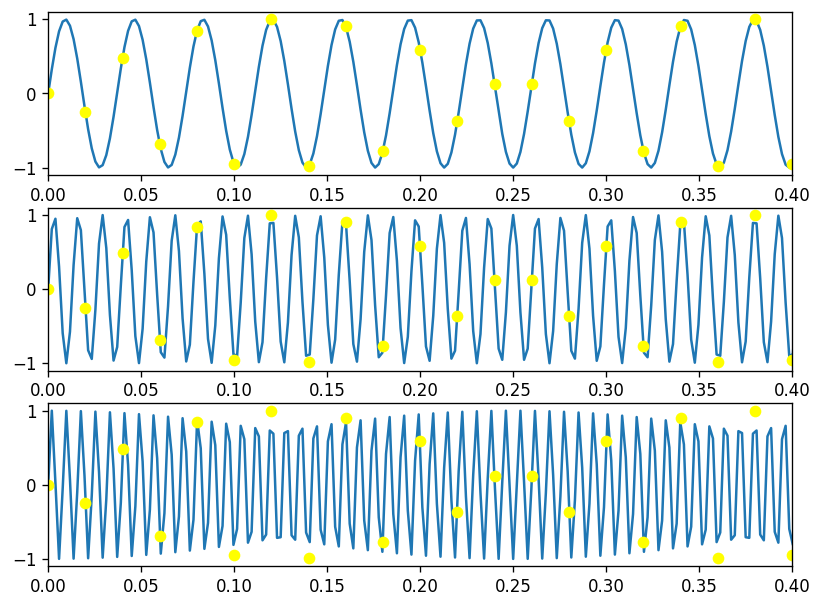

In [88]:
# 2
fs = 50
f_zero = 27

# endpoint=False a rezolvat din cauza la periodicitatea multiplilor?
t = np.linspace(0, 1, fs, endpoint=False)
t_bun = np.linspace(0, 1, 2**9, endpoint=False)


def semnal(freq, t):
    return np.sin(2 * np.pi * freq * t)


freqs = [f_zero, f_zero + 1 * fs, f_zero + 2 * fs]
print(freqs)

# "reale"
semnale_reale = [semnal(freq, t_bun) for freq in freqs]
semnale_sampled = [semnal(freq, t) for freq in freqs]

fig, axs = plt.subplots(3, 1, figsize=(8, 6))


for i, ax in enumerate(axs):
    ax.plot(t_bun, semnale_reale[i])
    ax.plot(t, semnale_sampled[i], color="yellow", marker="o", linestyle="")
    ax.set_xlim(0, 0.4)

plt.plot()

[27, 77, 127]


[]

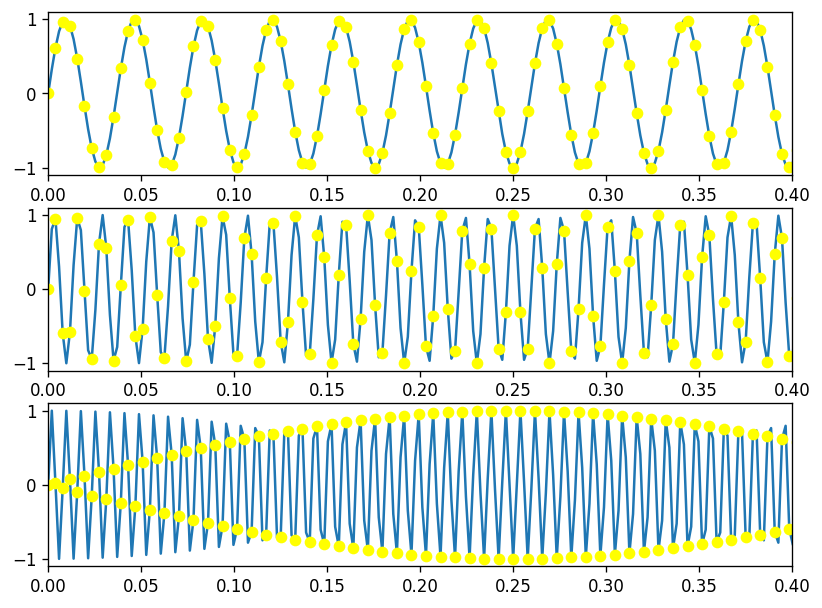

In [89]:
# 3
fs = 2**8

# endpoint=False a rezolvat din cauza la periodicitatea multiplilor?
t = np.linspace(0, 1, fs, endpoint=False)


print(freqs)

semnale_sampled = [semnal(freq, t) for freq in freqs]

fig, axs = plt.subplots(3, 1, figsize=(8, 6))
for i, ax in enumerate(axs):
    ax.plot(t_bun, semnale_reale[i])
    ax.plot(t, semnale_sampled[i], color="yellow", marker="o", linestyle="")
    ax.set_xlim(0, 0.4)


plt.plot()

In [91]:
# 4
f_max_bas = max([40, 200])
f_nyquisst = 2 * f_max_bas
f_nyquisst

400

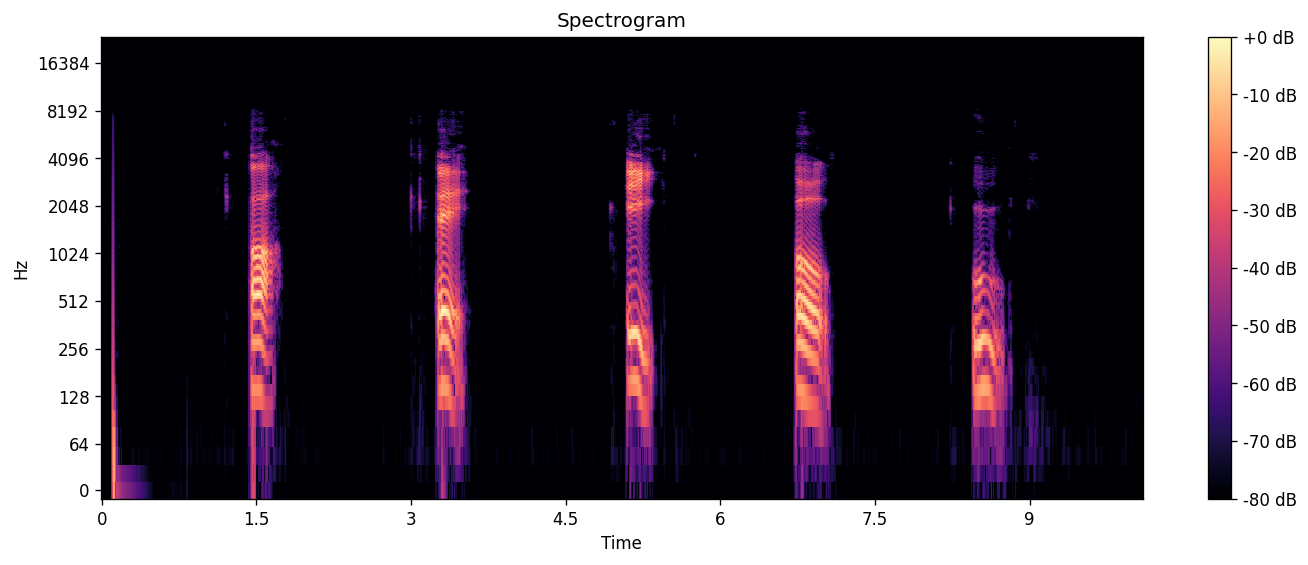

In [95]:
# 5 # o si u parca sunt usor mai diferite dar restul sunt foarte similare, analizat in sonic visualizer

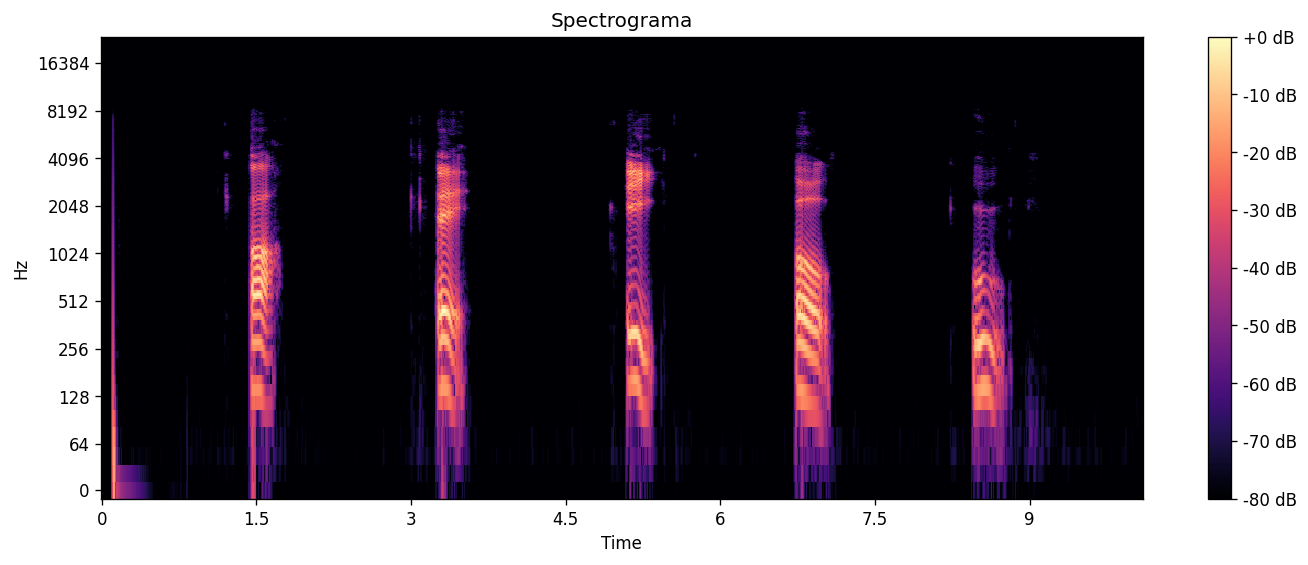

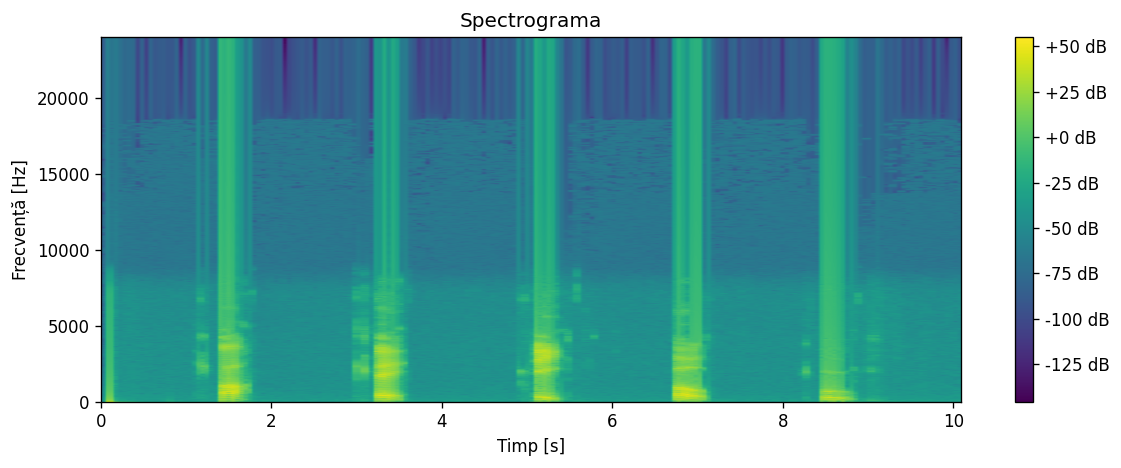

In [109]:
# 6, de ce b)?
import librosa

audio_path = "vocale.mp3"

y, sr = librosa.load(audio_path, sr=None)

# sanity check
D = librosa.stft(y)
S = np.abs(D)
S_db = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize=(14, 5))
librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="log")
plt.title("Spectrograma")
plt.colorbar(format="%+2.0f dB")
plt.show()

# metoda cu window
frame_length = int(0.01 * len(y))
hop_length = frame_length // 2


spectrogram = []

for i in range(0, len(y) - frame_length, hop_length):
    frame = y[i : i + frame_length]
    fft_result = np.fft.rfft(frame)
    spectrogram.append(np.abs(fft_result))

spectrogram = np.array(spectrogram).T

spectrogram = 20 * np.log10(spectrogram)

plt.figure(figsize=(10, 4))
plt.imshow(
    spectrogram, aspect="auto", origin="lower", extent=[0, len(y) / sr, 0, sr / 2]
)
plt.colorbar(format="%+2.0f dB")
plt.xlabel("Timp [s]")
plt.ylabel("Frecvență [Hz]")
plt.title("Spectrograma")
plt.tight_layout()
plt.show()

# nu prea arata la fel

In [113]:
# 7
P_semnal_db = 90
SNR_db = 80

# Psemnal_db = 10*log10(Psemnal)
# SNR_db = 10*log10(Psemnal/Pzgomot)

P_zgomot_db = P_semnal_db - SNR_db

print(f"{P_zgomot_db}dB")

10dB
